In [1]:
#imports
#input
import matplotlib.pyplot as plt
import skimage
from skimage import io
from glob import glob

#image represenation
import numpy as np

#image processing
from skimage import measure, filters, morphology, feature,segmentation, draw
from skimage.morphology import disk, square

#plotting
import seaborn as sns
import tabulate


(1024, 1024)


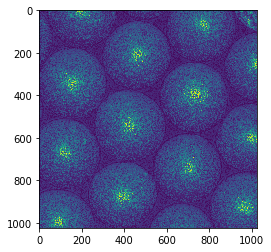

In [2]:
# Plastic balls pictured as contrast
pball_imname = glob("./tchakamau/Scan*/WP_001_I.tif")[0]
pball_img = io.imread(pball_imname, as_gray=True)
plt.imshow(pball_img)
print(pball_img.shape)

Text(0.5, 0, 'Intensity')

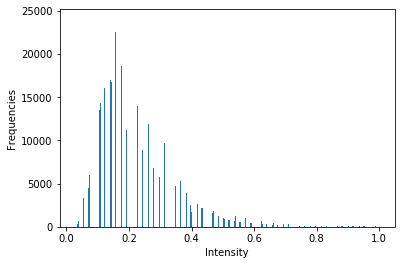

In [3]:
# Image histogram
fig,ax = plt.subplots()
plt.hist(pball_img.ravel(), bins=1024)
ax.set_ylabel("Frequencies")
ax.set_xlabel("Intensity")

0.23076384129606414
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


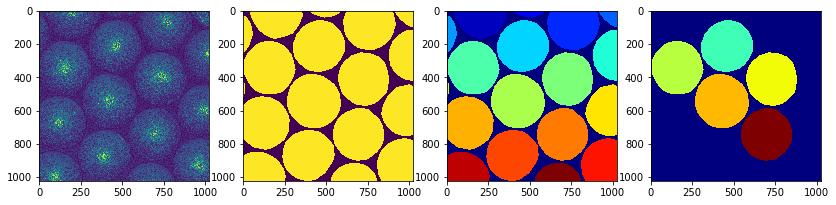

In [4]:
# Grabbing all balls
print(filters.threshold_li(pball_img))
pballs = morphology.closing(pball_img, disk(3))# 
bw_pballs = pballs  > filters.threshold_li(pball_img)
print(bw_pballs)
filled_pballs = morphology.convex_hull_object(morphology.remove_small_objects(bw_pballs, min_size=100))
labeled_pballs = measure.label(filled_pballs)
fig, ax = plt.subplots(ncols=4, figsize=(14,10))
inner_pballs = segmentation.clear_border(labeled_pballs)
ax[0].imshow(pball_img)
ax[1].imshow(filled_pballs)
ax[2].imshow(labeled_pballs, cmap='jet')
ax[3].imshow(inner_pballs, cmap='jet')

# Plastic balls pictured as contrast
pball_imname = glob("./tchakamau/Scan*/WP_001_H.tif")[0]
pball_img = io.imread(pball_imname, as_gray=True)
plt.imshow(pball_img)
print(pball_img.shape)

# Image histogram
fig,ax = plt.subplots()
plt.hist(pball_img.ravel(), bins=1024)
ax.set_ylabel("Frequencies")
ax.set_xlabel("Intensity")

# Grabbing all balls
print(filters.threshold_li(pball_img))
bw_pballs = pball_img > filters.threshold_li(pball_img)
print(bw_pballs)
filled_pballs = morphology.convex_hull_object(morphology.remove_small_objects(bw_pballs, min_size=100))
labeled_pballs = measure.label(filled_pballs)
fig, ax = plt.subplots(ncols=4, figsize=(14,10))
inner_pballs = segmentation.clear_border(labeled_pballs)
ax[0].imshow(pball_img)
ax[1].imshow(filled_pballs)
ax[2].imshow(labeled_pballs, cmap='jet')
ax[3].imshow(inner_pballs, cmap='jet')

[76173, 78579, 77731, 83379, 76070]


Text(0.5, 0, 'Areas')

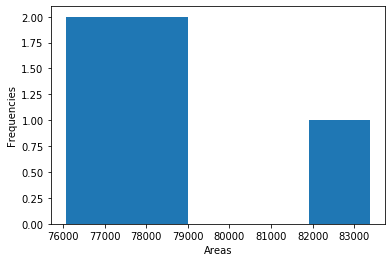

In [5]:
#Finding region properties - areas (for filtering), eccentricities, approx. diamaters
propslists = measure.regionprops(inner_pballs) # one list of properties per ball
areas = [region.area for region in propslists]
print(areas)
fig, ax = plt.subplots()
plt.hist(areas, bins=len(areas)) # -> < 50000 area = broken, 50000-110000 = single, > 110000 = multiple
ax.set_ylabel("Frequencies")
ax.set_xlabel("Areas")

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


[0.2775539290232588, 0.2916069838233745, 0.3067898906074042, 0.2762521878232941, 0.19089134199730523]
[0.7785662939062717, 0.7907665987261363, 0.7864881716045105, 0.8145606177584067, 0.7780397329507176]
[(76173, 1030.9158723275375), (78579, 1049.0163773909258), (77731, 1040.5310960166873), (83379, 1080.57272657703), (76070, 1031.2590180780453)]
[0.900667458498065, 0.8973292501931944, 0.9021816549366826, 0.8973431305138364, 0.8988511151347951] a


(array([2., 0., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([155.60794659, 156.33836429, 157.06878198, 157.79919968,
        158.52961737, 159.26003507, 159.99045277, 160.72087046,
        161.45128816, 162.18170586, 162.91212355]),
 <a list of 10 Patch objects>)

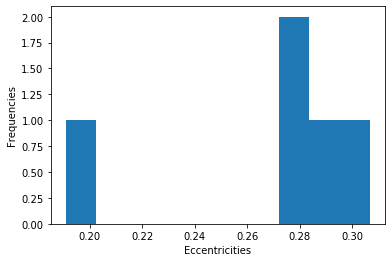

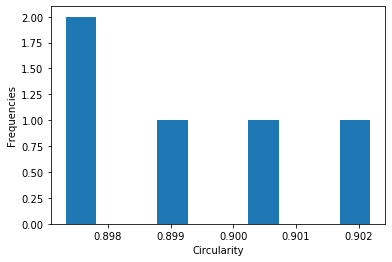

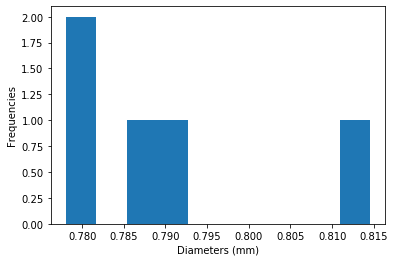

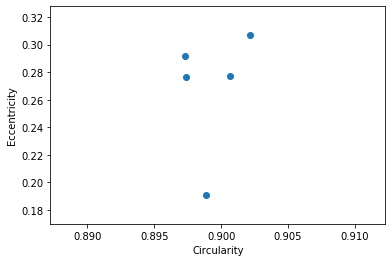

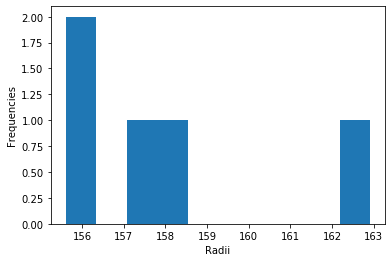

In [6]:
#Eccentricities, approx. diamaters for well-captured balls

eccs = [x.eccentricity for x in propslists ]
print(eccs)

diams = [x.equivalent_diameter *.0025 for x in propslists ]
print(diams)

convex_ims = [(x.area, x.perimeter) for x in propslists]
print(convex_ims)
circus = [4*np.pi*x[0]/(x[1])**2 for x in convex_ims ]
print(circus, 'a')

rads = [x.equivalent_diameter *.5 for x in propslists ]

fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Eccentricities")
plt.hist(eccs)

fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Circularity")
plt.hist(circus)

fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Diameters (mm)")
plt.hist(diams)

fig,ax = plt.subplots()
ax.set_ylabel("Eccentricity")
ax.set_xlabel("Circularity")
plt.scatter(circus, eccs)

fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Radii")
plt.hist(rads)

areas, eccs, equiv_rad:  [12100] [0.0] [62.06085419025319]


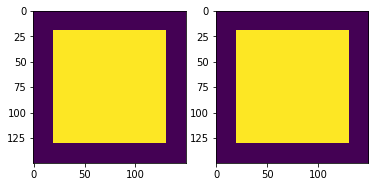

In [7]:
# Eccentricity of a square
sqim = np.zeros((150, 150), dtype=np.uint8)
start = (20,20)
extent = (110,110)
rr, cc = draw.rectangle(start, extent=extent, shape=sqim.shape)
sqim[rr,cc] = 1
fig,ax = plt.subplots(ncols=2)
ax[0].imshow(sqim)
sqimlab = measure.label(sqim)
ax[1].imshow(sqimlab)
sqregs = measure.regionprops(sqimlab)
sqars = [x.area for x in sqregs]
sqeccs = [x.eccentricity for x in sqregs]
sqrads = [x.equivalent_diameter / 2 for x in sqregs]
print("areas, eccs, equiv_rad: ",sqars,sqeccs, sqrads)

In [8]:
#Circularity of a square
pseud_rads = [x.equivalent_diameter / 2 for x in sqregs]
circ_mes = [4*np.pi*x.area/(x.perimeter)**2 for x in sqregs]
print(circ_mes)
boxars = [x.bbox_area / x.area for x in sqregs]
print(boxars)

[0.7998752442647189]
[1.0]


areas, eccs, equiv_rad:  [11277] [0.0] [59.91310863654637]


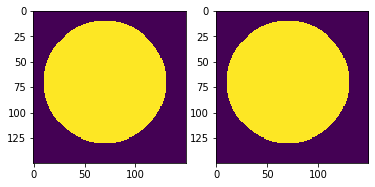

In [9]:
# Eccentricity of a circle
cim = np.zeros((150, 150), dtype=np.uint8)
rr, cc = draw.circle(70,70,60)
cim[rr,cc] = 1
fig,ax = plt.subplots(ncols=2)
ax[0].imshow(cim)
cimlab = measure.label(cim)
ax[1].imshow(cimlab)
cregs = measure.regionprops(cimlab)
cars = [x.area for x in cregs]
ceccs = [x.eccentricity for x in cregs]
crads = [x.equivalent_diameter / 2 for x in cregs]
print("areas, eccs, equiv_rad: ",cars,ceccs,crads)

In [10]:
#Circularity of a circle
circ_mes = [4*np.pi*x.area/(x.perimeter)**2 for x in cregs]
#4_pi_A/P^2 ~ 12.57_A/P^2,
print(circ_mes)
boxars = [x.bbox_area / x.area for x in cregs]
print(boxars)

[0.9206481137393214]
[1.2557417752948479]


In [11]:
circrads = np.linspace(100, 160, 20, endpoint=False)
circspans = [int(2*x + 2) for x in circrads]
circcents = [int(rad + (span-rad*2)/2) for rad, span in zip(circrads, circspans)]
print(circrads, circcents, circspans)

[100. 103. 106. 109. 112. 115. 118. 121. 124. 127. 130. 133. 136. 139.
 142. 145. 148. 151. 154. 157.] [101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155, 158] [202, 208, 214, 220, 226, 232, 238, 244, 250, 256, 262, 268, 274, 280, 286, 292, 298, 304, 310, 316]


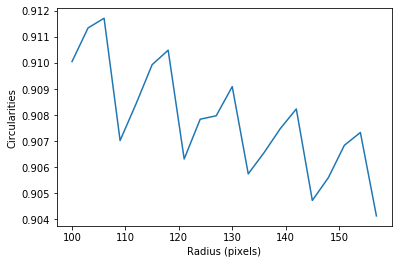

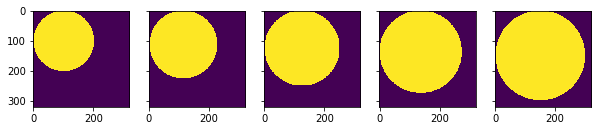

In [12]:
circularities = []
eccentricities = []
circles = []
circinds = list(range(len(circrads)))
for circind in circinds:
    cim = np.zeros((320, 320), dtype=np.uint8)
    rr, cc = draw.circle(circcents[circind],circcents[circind],circrads[circind])
    cim[rr,cc] = 1
    circles.append(cim)
    cimlab = measure.label(cim)
    circreg = measure.regionprops(cimlab)[0]
    circularity = 4*np.pi*circreg.area/(circreg.perimeter)**2 
    ecc = circreg.eccentricity
    circularities.append(circularity)
    eccentricities.append(ecc)
fig,ax = plt.subplots()
ax.set_ylabel("Circularities")
ax.set_xlabel("Radius (pixels)")
ax.plot(circrads, circularities)

fig, ax = plt.subplots(ncols = 5, figsize = (10,10), sharex=True, sharey=True)
for i in range(0, 5):
    ax[i].imshow(circles[i*int(len(circrads)/5)])
    

In [13]:
sqlens = np.linspace(200, 320, 20, endpoint=False)
sqlens = [int(x) for x in sqlens]
sqspans = [int(x + 8) for x in sqlens]
print(sqlens, sqspans)

[200, 206, 212, 218, 224, 230, 236, 242, 248, 254, 260, 266, 272, 278, 284, 290, 296, 302, 308, 314] [208, 214, 220, 226, 232, 238, 244, 250, 256, 262, 268, 274, 280, 286, 292, 298, 304, 310, 316, 322]


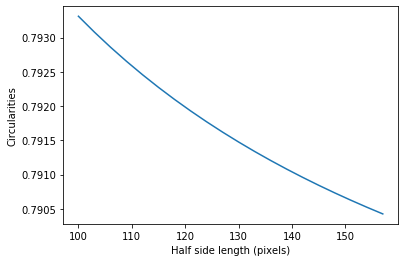

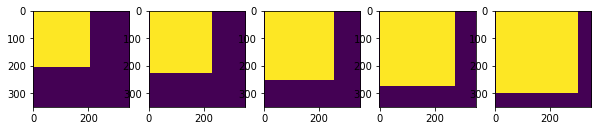

In [14]:
circularities = []
eccentricities = []
squares = []
squarinds = list(range(len(sqlens)))
for squarind in squarinds:
    sqim = np.zeros((350, 350), dtype=np.uint8)
    start = (4,4)
    extent = (sqlens[squarind],sqlens[squarind])
    rr, cc = draw.rectangle(start, extent=extent, shape=sqim.shape)
    sqim[rr,cc] = 1
    squares.append(sqim)
    sqimlab = measure.label(sqim)
    sqreg = measure.regionprops(sqimlab)[0]
    circularity = 4*np.pi*sqreg.area/(sqreg.perimeter)**2 
    ecc = sqreg.eccentricity
    circularities.append(circularity)
    eccentricities.append(ecc)
fig,ax = plt.subplots()
ax.set_ylabel("Circularities")
ax.set_xlabel("Half side length (pixels)")
ax.plot([x/2 for x in sqlens], circularities)

fig, ax = plt.subplots(ncols = 5, figsize = (10,10))
for i in range(0, 5):
    ax[i].imshow(squares[i*int(len(sqlens)/5)])

In [15]:
##Pipeline

In [16]:
def barplotter(pdata, wpdata, names):
    for i in range(len(names)):
        datalist = [pdata[i], wpdata[i], (pdata[i], wpdata[i])]
        datanames = [names[i], 'w'+names[i], (names[i], 'w'+names[i])]
        fig,ax = plt.subplots(ncols=3, sharey = True, figsize = (14,6))
        for axnum in range(len(ax)):
            ax[axnum].set_xlabel(datanames[axnum])
            ax[axnum].set_ylabel('Frequency')
            ax[axnum].hist(datalist[axnum], bins = len(pdata[i]), label = datanames[axnum])
            ax[axnum].legend(prop={'size': 10})
        fig.tight_layout()
        plt.show()
        
#barplotter([areas, circularities], [wareas, wcircularities], ['Area', 'Circularity'])

In [17]:
#Washed plastic
pballs_imnames = glob("./tchakamau/Scan*/WP_*_I.tif")
read = io.imread
li = filters.threshold_li
cho = morphology.convex_hull_object
rso = morphology.remove_small_objects
label = measure.label
c_border = segmentation.clear_border

wareas = []
wcircularities = []
wdiameters = [] # converted from pixels to mm
weccentricities = []

for imname in pballs_imnames:
    pball_img = read(imname, as_gray=True)
    pballs = morphology.closing(pball_img, disk(3))# 
    bw_pballs = pballs  > li(pball_img)
    smooth_pballs = cho(rso(bw_pballs, min_size=100))
    labeled_pballs = label(smooth_pballs)
    inner_pballs = c_border(labeled_pballs)
    propslists = measure.regionprops(inner_pballs) # one list of properties per ball
    ars = [x.area for x in propslists ]
    diams = [x.equivalent_diameter *.0025 for x in propslists ]
    circs = [4*np.pi*x.area/(x.perimeter)**2 for x in propslists ]
    eccs  = [x.eccentricity for x in propslists ]
    wareas.extend(ars)
    wcircularities.extend(circs)
    wdiameters.extend(diams)
    weccentricities.extend(eccs)
    
#Unashed plastic
pballs_imnames = glob("./tchakamau/Scan*/P_*_I.tif")
print(pballs_imnames)
read = io.imread
li = filters.threshold_li
cho = morphology.convex_hull_object
rso = morphology.remove_small_objects
label = measure.label
c_border = segmentation.clear_border

areas = []
circularities = []
diameters = [] # converted from pixels to mm
eccentricities = []


for imname in pballs_imnames:
    pball_img = read(imname, as_gray=True)
    pballs = morphology.closing(pball_img, disk(3))# 
    bw_pballs = pballs  > li(pball_img)
    smooth_pballs = cho(rso(bw_pballs, min_size=100))
    labeled_pballs = label(smooth_pballs)
    inner_pballs = c_border(labeled_pballs)
    propslists = measure.regionprops(inner_pballs) # one list of properties per ball
    ars = [x.area for x in propslists ]
    diams = [x.equivalent_diameter *.0025 for x in propslists ]
    circs = [4*np.pi*x.area/(x.perimeter)**2 for x in propslists ]
    eccs  = [x.eccentricity for x in propslists ]
    areas.extend(ars)
    circularities.extend(circs)
    diameters.extend(diams)
    eccentricities.extend(eccs)

['./tchakamau\\Scans_of_balls\\P_000_I.tif', './tchakamau\\Scans_of_balls\\P_001_I.tif', './tchakamau\\Scans_of_balls\\P_002_I.tif', './tchakamau\\Scans_of_balls\\P_003_I.tif', './tchakamau\\Scans_of_balls\\P_004_I.tif', './tchakamau\\Scans_of_balls\\P_005_I.tif', './tchakamau\\Scans_of_balls\\P_006_I.tif', './tchakamau\\Scans_of_balls\\P_007_I.tif']


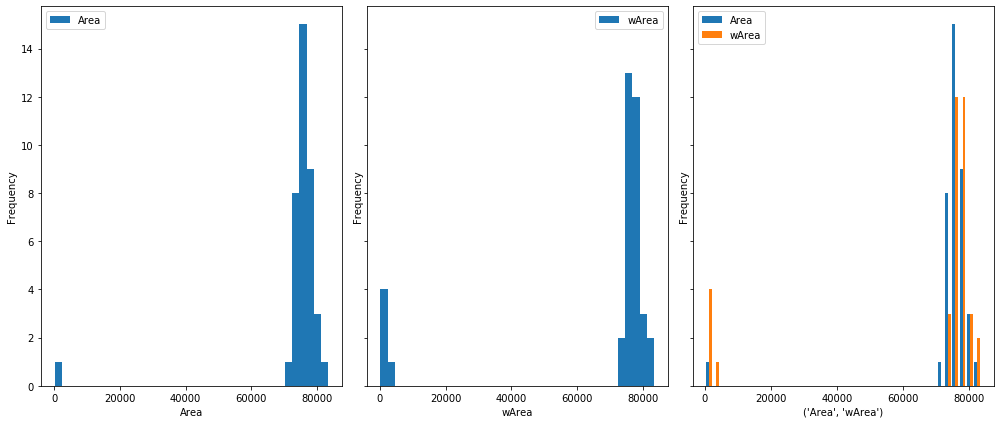

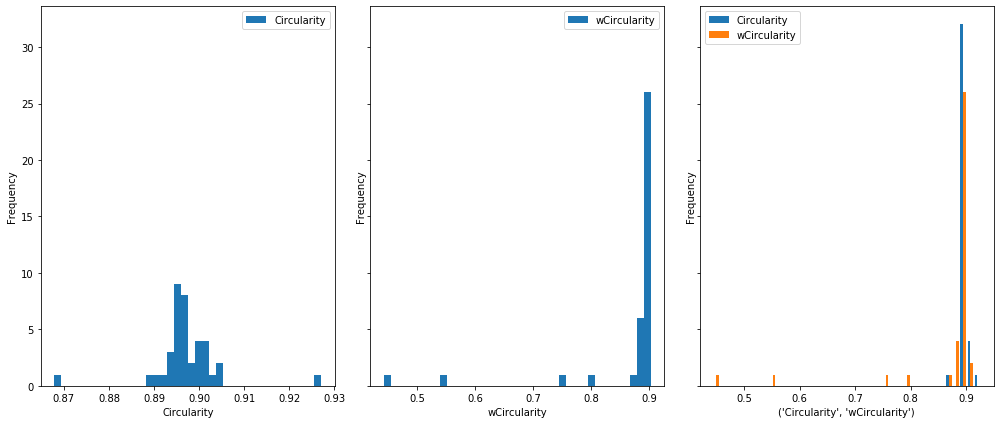

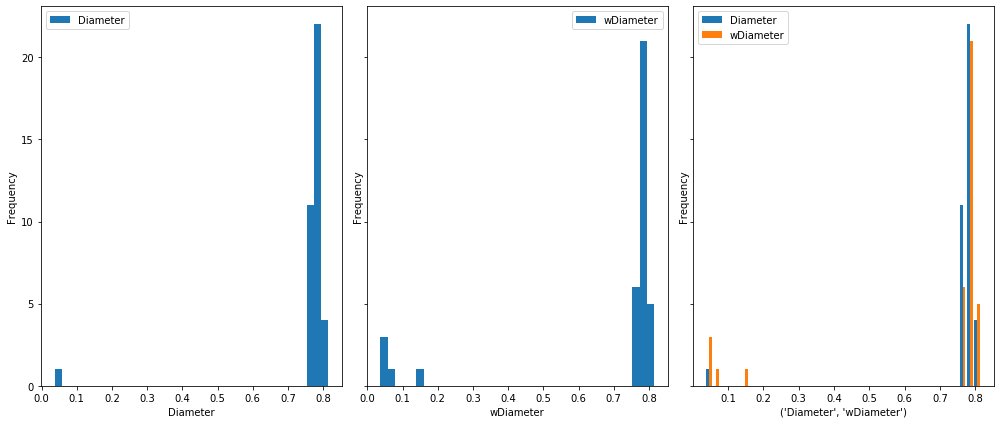

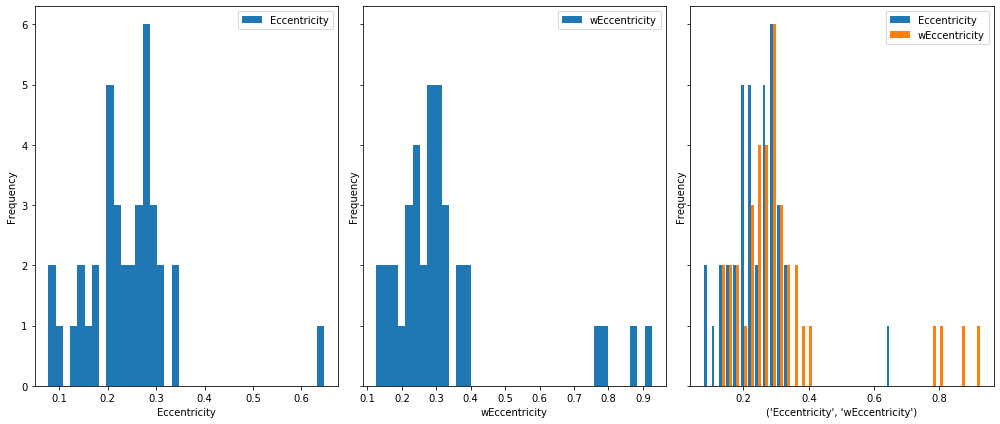

In [18]:
#Plots
data = [areas, circularities, diameters, eccentricities]
wdata = [wareas, wcircularities, wdiameters, weccentricities]
names = ['Area', 'Circularity', 'Diameter', 'Eccentricity']
labels = ["Unwashed", "Washed"]
barplotter(data, wdata, names)


#Differences
fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Area")
plt.hist([areas,wareas], bins = len(areas),label=('areas', 'wareas'))
ax.legend(prop={'size': 10})

fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Circularity")
plt.hist([circularities,wcircularities], bins = len(areas),label=('circularities', 'wcircularities'), range = (0.88, 0.91))
ax.legend(prop={'size': 10})

fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Diameter")
plt.hist([diameters,wdiameters], bins = len(areas),label=('diameters', 'wdiameters'))
ax.legend(prop={'size': 10})


fig,ax = plt.subplots()
ax.set_ylabel("Frequencies")
ax.set_xlabel("Eccentricity")
plt.hist([eccentricities, weccentricities], bins = len(areas),label=('eccentricities', 'weccentricities'))
ax.legend(prop={'size': 10})
